In [1]:
import pandas as pd

In [2]:
file_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Dataset.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


                 Metric  Day         Value Metric_Type
0          Total Orders    1  94817.000000      Orders
1      Completed Orders    1  93386.000000      Orders
2           Basket Size    1    494.759932      Basket
3  Percent Promo Orders    1      0.112940      Orders
4   Average Promo Value    1     84.000000   Promotion


## Add a promo column for case study 1

In [3]:
def assign_promo(day):
    if 1 <= day <= 7:
        return "No Promo"
    elif 8 <= day <= 14:
        return "Php 100 off (min basket 400)"
    elif 15 <= day <= 21:
        return "No Promo"
    elif 22 <= day <= 28:
        return "Free Delivery (Php 59, min basket 550)"
    else:
        return "Unknown"

df['Promo'] = df['Day'].apply(assign_promo)

print(df.head(15))


                             Metric  Day         Value Metric_Type     Promo
0                      Total Orders    1  94817.000000      Orders  No Promo
1                  Completed Orders    1  93386.000000      Orders  No Promo
2                       Basket Size    1    494.759932      Basket  No Promo
3              Percent Promo Orders    1      0.112940      Orders  No Promo
4               Average Promo Value    1     84.000000   Promotion  No Promo
5       Basket Size of Promo Orders    1    540.000000      Orders  No Promo
6   Basket Size of Non-Promo Orders    1    489.000000      Orders  No Promo
7      Average Delivery TIme (mins)    1     42.040000       Other  No Promo
8         Average Delivery Distance    1      3.990000       Other  No Promo
9                      Total Orders    2  95700.000000      Orders  No Promo
10                 Completed Orders    2  94750.000000      Orders  No Promo
11                      Basket Size    2    484.783641      Basket  No Promo

In [4]:
# Pivot only for key metrics
metrics_to_analyze = [
    "Total Orders", 
    "Completed Orders", 
    "Basket Size", 
    "Percent Promo Orders"
]

summary = (
    df[df['Metric'].isin(metrics_to_analyze)]
    .groupby(['Promo', 'Metric'])['Value']
    .mean()
    .reset_index()
    .pivot(index='Promo', columns='Metric', values='Value')
)

print(summary)


Metric                                  Basket Size  Completed Orders  \
Promo                                                                   
Free Delivery (Php 59, min basket 550)   501.379694     117142.857143   
No Promo                                 486.132302      97870.428571   
Php 100 off (min basket 400)             505.116709     116492.857143   

Metric                                  Percent Promo Orders   Total Orders  
Promo                                                                        
Free Delivery (Php 59, min basket 550)              0.281976  118807.142857  
No Promo                                            0.133436   99208.357143  
Php 100 off (min basket 400)                        0.243461  118307.142857  


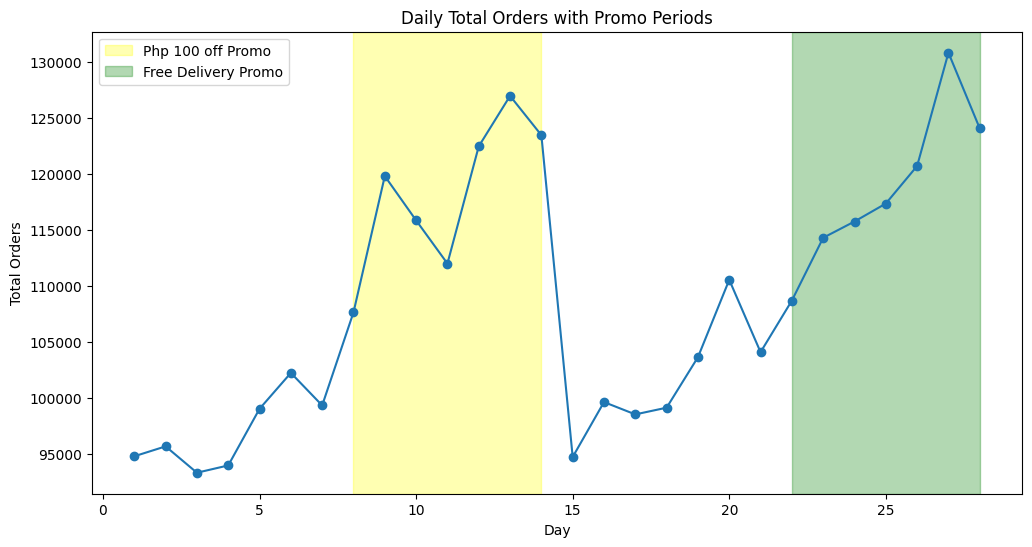

In [5]:
import matplotlib.pyplot as plt

# Filter for Total Orders
total_orders = df[df['Metric'] == 'Total Orders']

plt.figure(figsize=(12, 6))
plt.plot(total_orders['Day'], total_orders['Value'], marker='o')
plt.title('Daily Total Orders with Promo Periods')
plt.xlabel('Day')
plt.ylabel('Total Orders')

# Add shaded regions for promo periods
plt.axvspan(8, 14, color='yellow', alpha=0.3, label='Php 100 off Promo')
plt.axvspan(22, 28, color='green', alpha=0.3, label='Free Delivery Promo')

plt.legend()
plt.show()


In [7]:
df2 = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Dataset_with_Promo.csv"
df.to_csv(df2, index=False)

print(f"Updated dataset saved to: {df2}")

Updated dataset saved to: C:\Users\Salvador\Downloads\Case Study\Cleaned_Dataset_with_Promo.csv


                 Metric  Day         Value Metric_Type     Promo
0          Total Orders    1  94817.000000      Orders  No Promo
1      Completed Orders    1  93386.000000      Orders  No Promo
2           Basket Size    1    494.759932      Basket  No Promo
3  Percent Promo Orders    1      0.112940      Orders  No Promo
4   Average Promo Value    1     84.000000   Promotion  No Promo


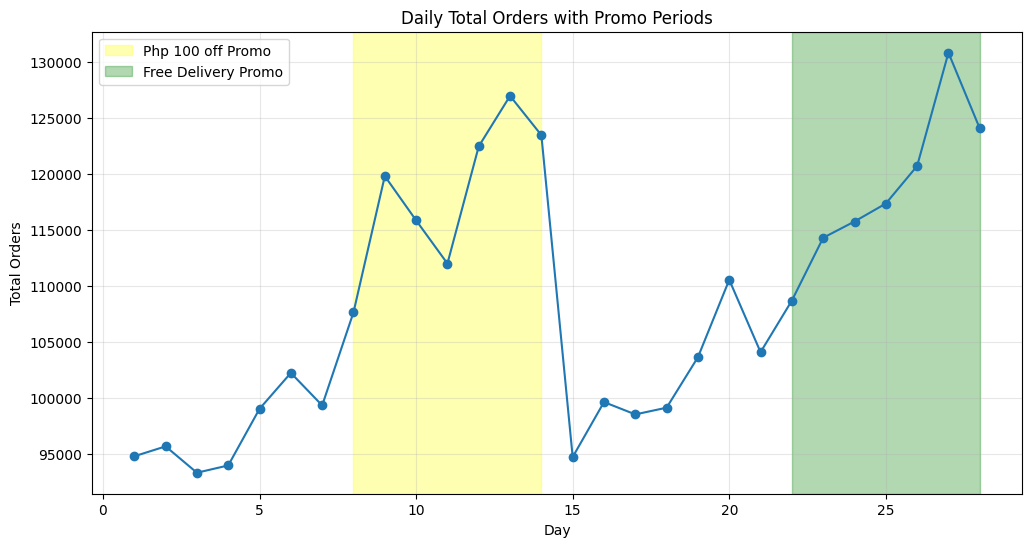

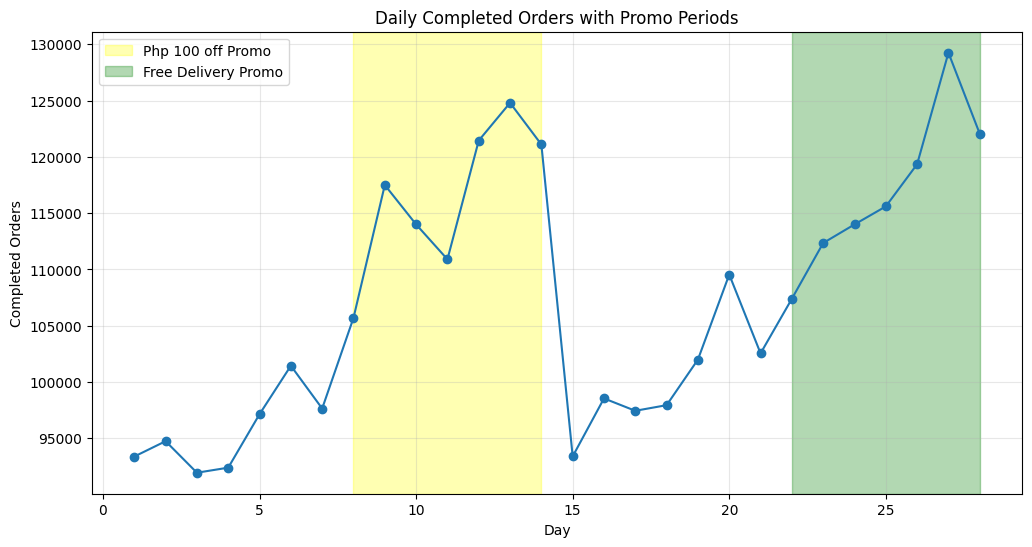

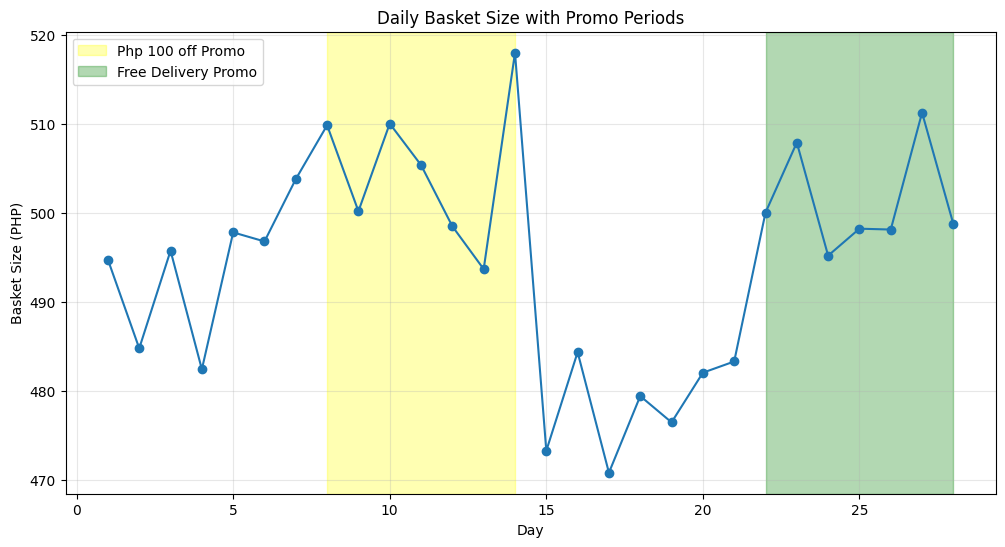

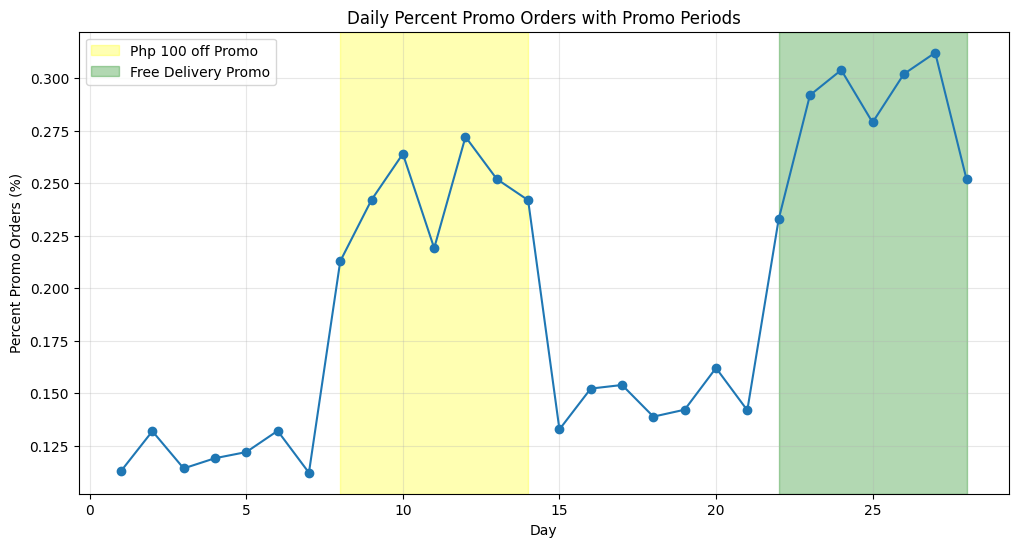

Summary table saved to: C:\Users\Salvador\Downloads\Case Study\Promo_Performance_Summary.csv

Summary Table:
 Metric                                  Basket Size  Completed Orders  \
Promo                                                                   
Free Delivery (Php 59, min basket 550)   501.379694     117142.857143   
No Promo                                 486.132302      97870.428571   
Php 100 off (min basket 400)             505.116709     116492.857143   

Metric                                  Percent Promo Orders   Total Orders  
Promo                                                                        
Free Delivery (Php 59, min basket 550)              0.281976  118807.142857  
No Promo                                            0.133436   99208.357143  
Php 100 off (min basket 400)                        0.243461  118307.142857  


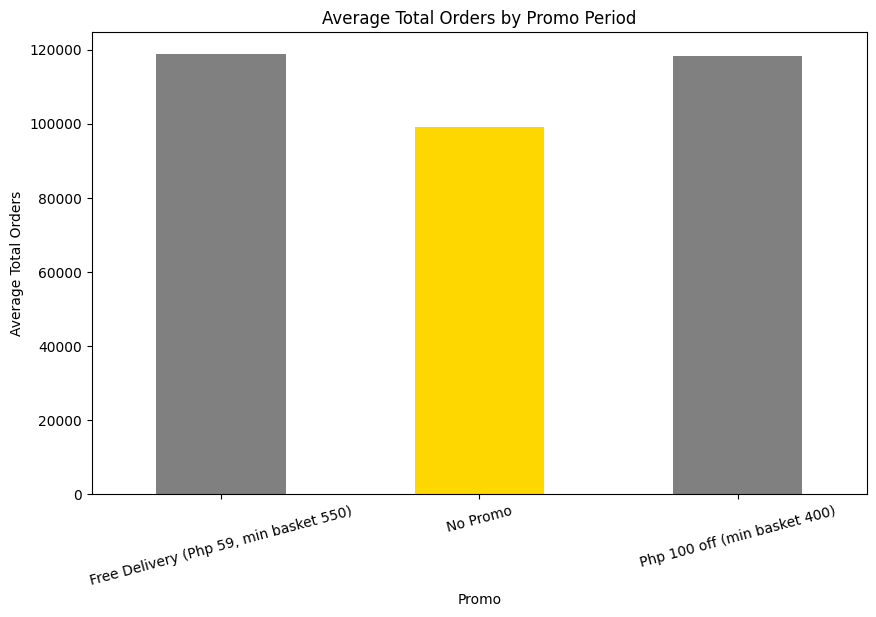

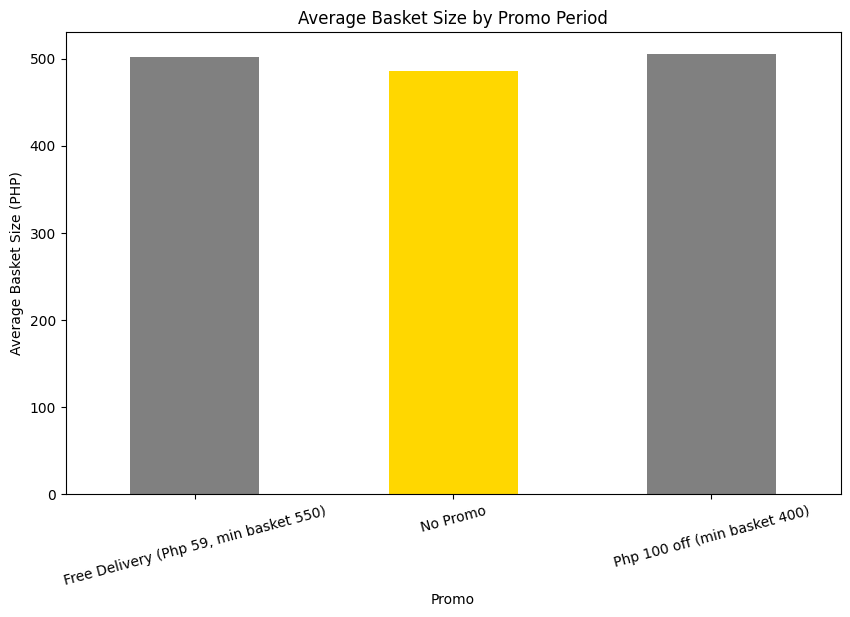

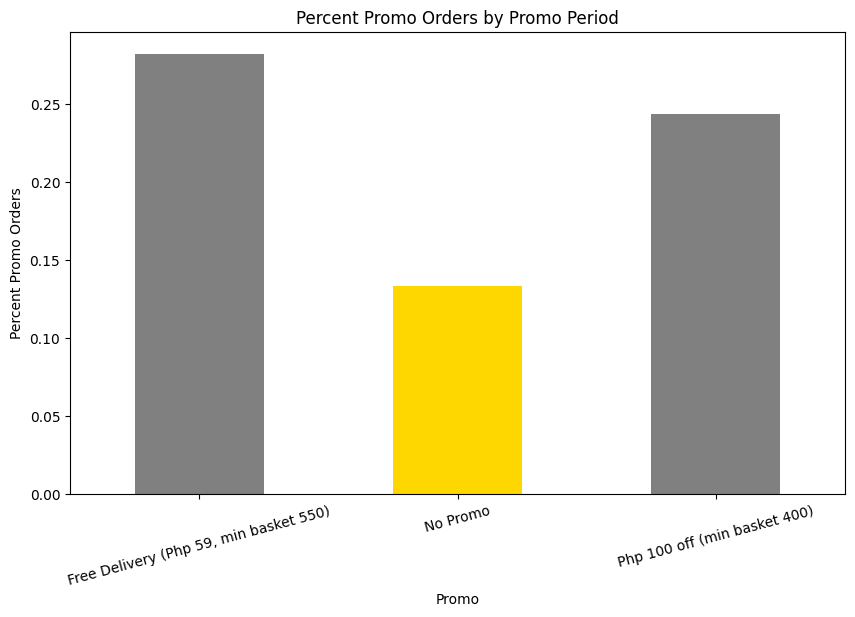

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with promo info
file_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Dataset_with_Promo.csv"
df = pd.read_csv(file_path)

# Ensure column names are correct
print(df.head())

# --- Filter key metrics ---
metrics_to_plot = ["Total Orders", "Completed Orders", "Basket Size", "Percent Promo Orders"]

# --- Function to create line plots for each metric ---
def plot_metric(metric, y_label):
    data = df[df['Metric'] == metric]
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Day'], data['Value'], marker='o')
    plt.title(f'Daily {metric} with Promo Periods')
    plt.xlabel('Day')
    plt.ylabel(y_label)
    
    # Highlight promo periods
    plt.axvspan(8, 14, color='yellow', alpha=0.3, label='Php 100 off Promo')
    plt.axvspan(22, 28, color='green', alpha=0.3, label='Free Delivery Promo')
    
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# --- Generate visualizations ---
plot_metric("Total Orders", "Total Orders")
plot_metric("Completed Orders", "Completed Orders")
plot_metric("Basket Size", "Basket Size (PHP)")
plot_metric("Percent Promo Orders", "Percent Promo Orders (%)")

# --- Compare Promo vs Non-Promo performance ---
summary = (
    df[df['Metric'].isin(metrics_to_plot)]
    .groupby(['Promo', 'Metric'])['Value']
    .mean()
    .reset_index()
    .pivot(index='Promo', columns='Metric', values='Value')
)

# Save summary table
summary_path = r"C:\Users\Salvador\Downloads\Case Study\Promo_Performance_Summary.csv"
summary.to_csv(summary_path)
print(f"Summary table saved to: {summary_path}")

print("\nSummary Table:\n", summary)

# --- Bar chart: Average Total Orders by Promo Period ---
plt.figure(figsize=(10, 6))
summary['Total Orders'].plot(kind='bar', color=['gray', 'gold', 'gray', 'green'])
plt.title('Average Total Orders by Promo Period')
plt.ylabel('Average Total Orders')
plt.xticks(rotation=15)
plt.show()

# --- Bar chart: Average Basket Size by Promo Period ---
plt.figure(figsize=(10, 6))
summary['Basket Size'].plot(kind='bar', color=['gray', 'gold', 'gray', 'green'])
plt.title('Average Basket Size by Promo Period')
plt.ylabel('Average Basket Size (PHP)')
plt.xticks(rotation=15)
plt.show()

# --- Bar chart: Percent Promo Orders by Promo Period ---
plt.figure(figsize=(10, 6))
summary['Percent Promo Orders'].plot(kind='bar', color=['gray', 'gold', 'gray', 'green'])
plt.title('Percent Promo Orders by Promo Period')
plt.ylabel('Percent Promo Orders')
plt.xticks(rotation=15)
plt.show()


Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Total_Orders_Trend.png


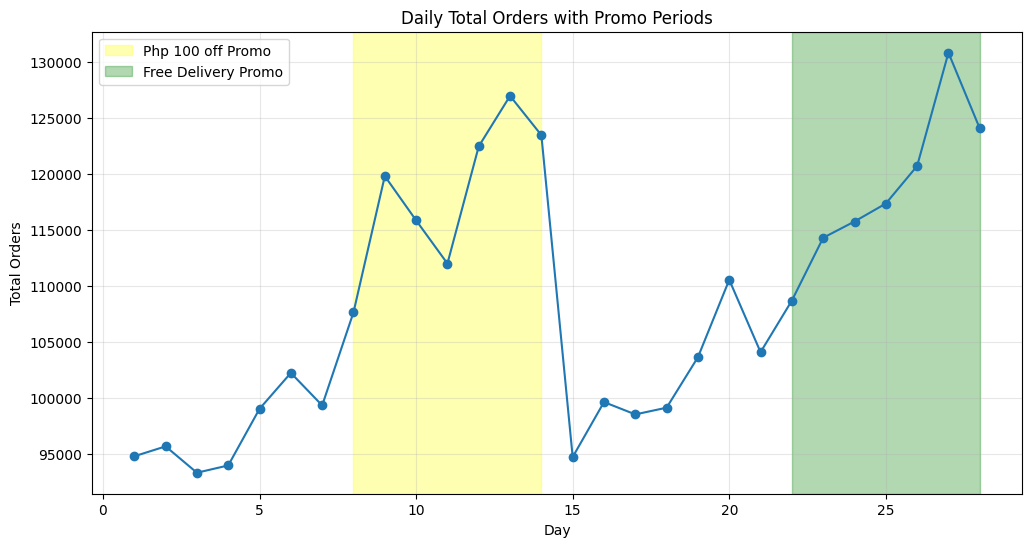

Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Completed_Orders_Trend.png


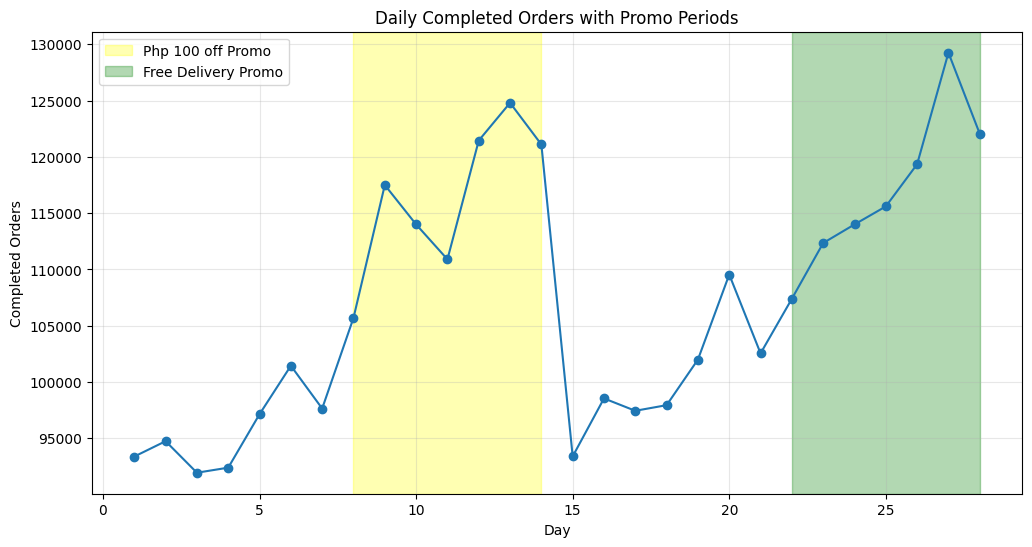

Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Basket_Size_Trend.png


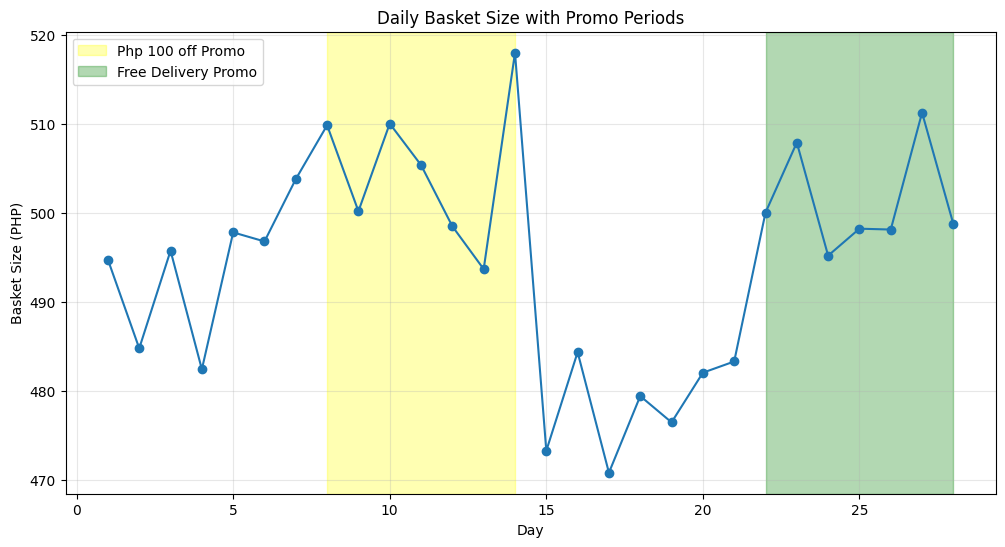

Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Promo_Orders_Trend.png


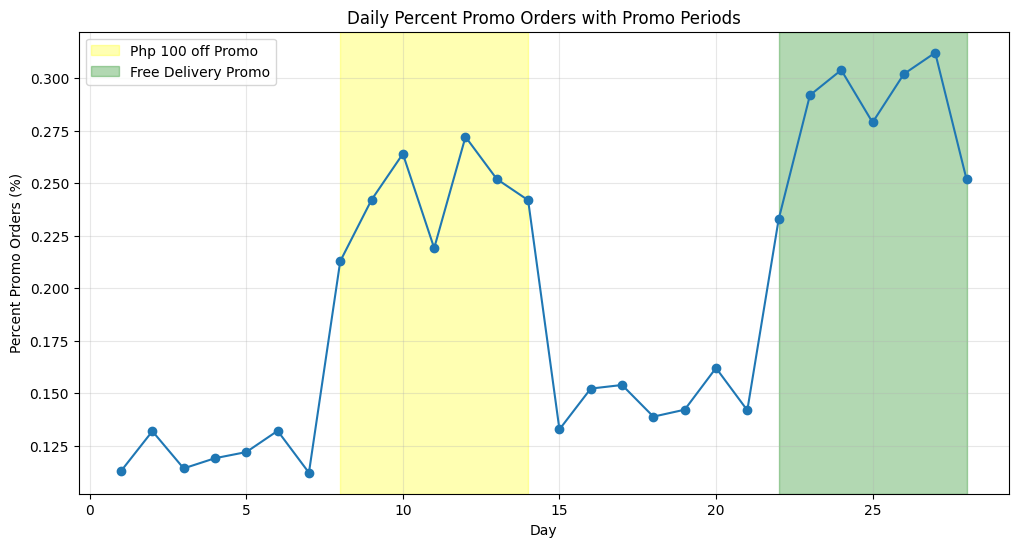

Summary table saved to: C:\Users\Salvador\Downloads\Case Study\Figures\Promo_Performance_Summary.csv
Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Avg_Total_Orders.png


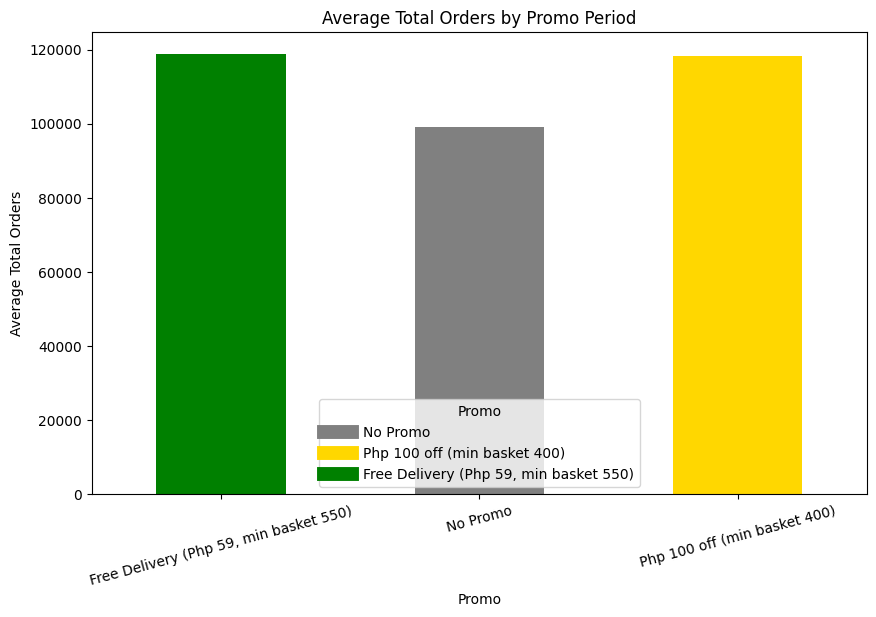

Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Avg_Basket_Size.png


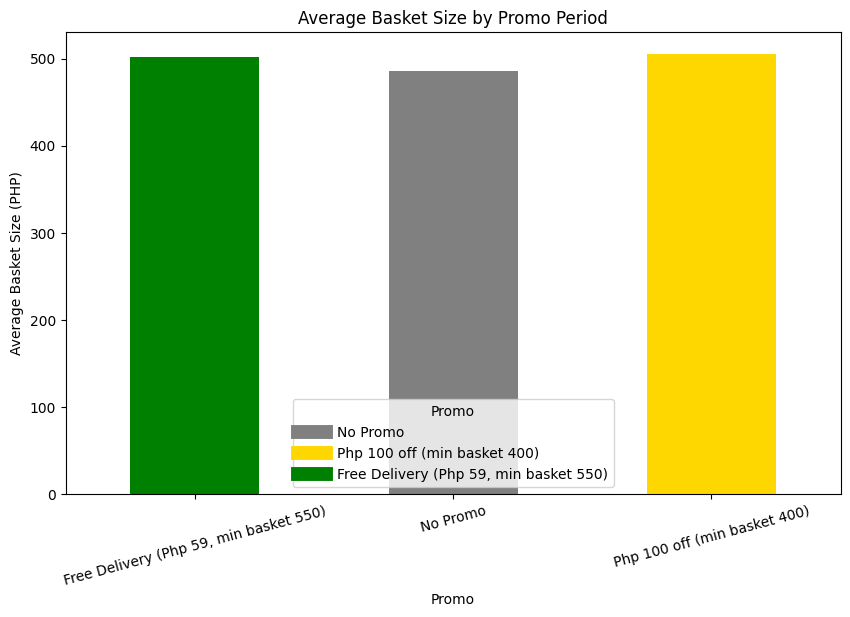

Saved: C:\Users\Salvador\Downloads\Case Study\Figures\Percent_Promo_Orders.png


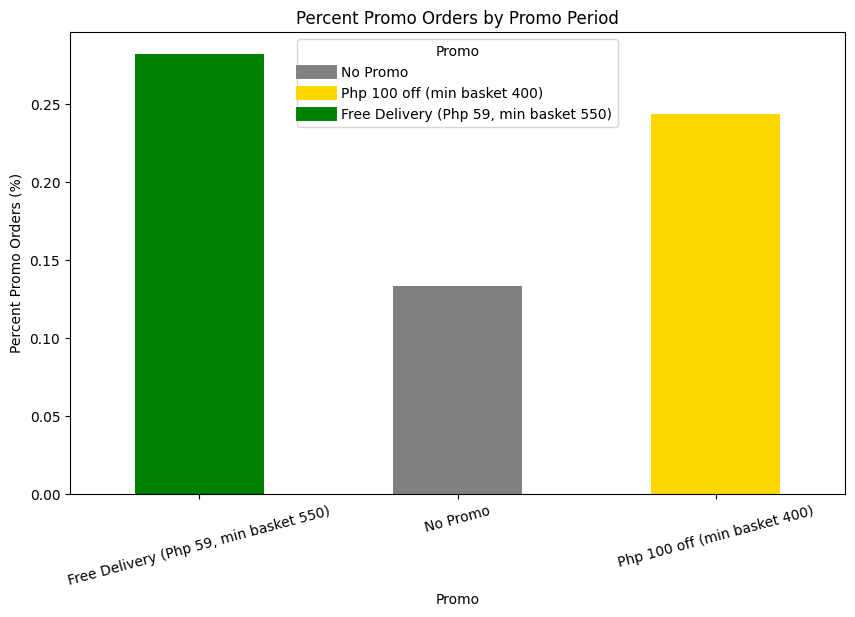

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load dataset with promo info
file_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Dataset_with_Promo.csv"
df = pd.read_csv(file_path)

# Directory to save figures
save_dir = r"C:\Users\Salvador\Downloads\Case Study\Figures"
os.makedirs(save_dir, exist_ok=True)

# Function to create and save line plots for each metric
def plot_metric(metric, y_label, filename):
    data = df[df['Metric'] == metric]
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Day'], data['Value'], marker='o')
    plt.title(f'Daily {metric} with Promo Periods')
    plt.xlabel('Day')
    plt.ylabel(y_label)
    
    # Highlight promo periods
    plt.axvspan(8, 14, color='yellow', alpha=0.3, label='Php 100 off Promo')
    plt.axvspan(22, 28, color='green', alpha=0.3, label='Free Delivery Promo')
    
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Save the figure
    fig_path = os.path.join(save_dir, filename)
    plt.savefig(fig_path)
    print(f"Saved: {fig_path}")
    plt.show()

# Generate and save line charts
plot_metric("Total Orders", "Total Orders", "Total_Orders_Trend.png")
plot_metric("Completed Orders", "Completed Orders", "Completed_Orders_Trend.png")
plot_metric("Basket Size", "Basket Size (PHP)", "Basket_Size_Trend.png")
plot_metric("Percent Promo Orders", "Percent Promo Orders (%)", "Promo_Orders_Trend.png")

# --- Compare Promo vs Non-Promo performance ---
metrics_to_plot = ["Total Orders", "Completed Orders", "Basket Size", "Percent Promo Orders"]

summary = (
    df[df['Metric'].isin(metrics_to_plot)]
    .groupby(['Promo', 'Metric'])['Value']
    .mean()
    .reset_index()
    .pivot(index='Promo', columns='Metric', values='Value')
)

# Save summary table
summary_path = os.path.join(save_dir, "Promo_Performance_Summary.csv")
summary.to_csv(summary_path)
print(f"Summary table saved to: {summary_path}")

color_map = {
    'No Promo': 'gray',
    'Php 100 off (min basket 400)': 'gold',
    'Free Delivery (Php 59, min basket 550)': 'green'
}

# Bar chart function
# Updated bar chart function with dynamic colors
def save_bar_chart(series, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    
    # Map colors based on promo names (index of the series)
    colors = [color_map.get(idx, 'gray') for idx in series.index]
    
    # Plot bars without default legend
    series.plot(kind='bar', color=colors, legend=False)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=15)
    
    # Add custom legend manually
    handles = [plt.Line2D([0], [0], color=color, lw=10) for color in color_map.values()]
    labels = list(color_map.keys())
    plt.legend(handles, labels, title="Promo")
    
    # Save the figure
    fig_path = os.path.join(save_dir, filename)
    plt.savefig(fig_path, bbox_inches='tight')
    print(f"Saved: {fig_path}")
    plt.show()

# Generate and save bar charts
save_bar_chart(summary['Total Orders'], 'Average Total Orders by Promo Period', 
               'Average Total Orders', 'Avg_Total_Orders.png')

save_bar_chart(summary['Basket Size'], 'Average Basket Size by Promo Period', 
               'Average Basket Size (PHP)', 'Avg_Basket_Size.png')

save_bar_chart(summary['Percent Promo Orders'], 'Percent Promo Orders by Promo Period', 
               'Percent Promo Orders (%)', 'Percent_Promo_Orders.png')

C:\Users\Salvador\AppData\Roaming\Python\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


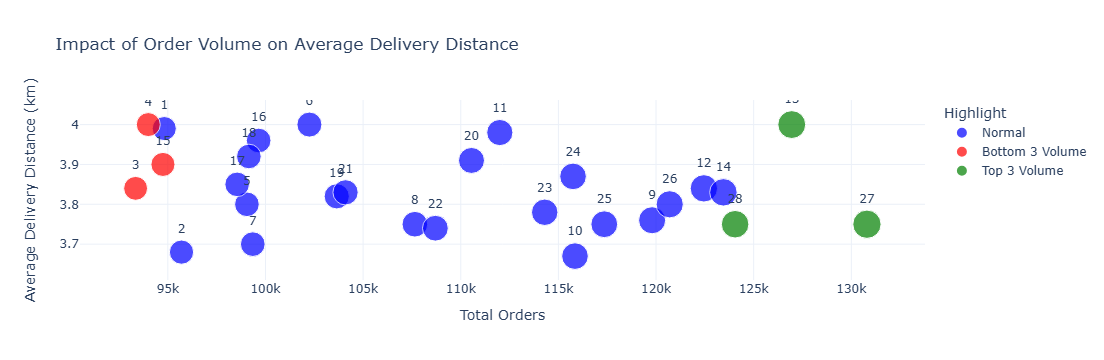

In [16]:
import pandas as pd
import plotly.express as px

# Load dataset
file_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Dataset_with_Promo.csv"
df = pd.read_csv(file_path)

# Filter for relevant metrics
order_metrics = df[df['Metric'].str.contains('Orders', case=False)]
distance_metrics = df[df['Metric'].str.contains('Distance', case=False)]

# Merge Total Orders and Average Delivery Distance by day
total_orders = order_metrics[order_metrics['Metric'] == 'Total Orders'][['Day', 'Value']].rename(columns={'Value': 'Total Orders'})
avg_distance = distance_metrics[['Day', 'Value']].rename(columns={'Value': 'Avg Delivery Distance'})

merged_df = pd.merge(total_orders, avg_distance, on='Day')
sorted_days = merged_df.sort_values(by='Total Orders', ascending=False)

# Add column to highlight top and bottom 3 days
merged_df['Highlight'] = 'Normal'
merged_df.loc[merged_df['Day'].isin(sorted_days.head(3)['Day']), 'Highlight'] = 'Top 3 Volume'
merged_df.loc[merged_df['Day'].isin(sorted_days.tail(3)['Day']), 'Highlight'] = 'Bottom 3 Volume'

# Create interactive scatter plot
fig = px.scatter(
    merged_df,
    x='Total Orders',
    y='Avg Delivery Distance',
    text='Day',
    color='Highlight',
    title='Impact of Order Volume on Average Delivery Distance',
    hover_data={'Day': True, 'Total Orders': True, 'Avg Delivery Distance': True},
    size='Total Orders',
    color_discrete_map={'Normal': 'blue', 'Top 3 Volume': 'green', 'Bottom 3 Volume': 'red'}
)

fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Total Orders', yaxis_title='Average Delivery Distance (km)', template='plotly_white')

fig.show()


### 1. If you were to choose which promo to run again, which one would you choose and why?

- **Free Delivery Promo** had the highest order volume and had strong promo adoption, with only a minimal decrease in basket size despite a higher minimum basket requirement (Php 550).

### If you are tasked to craft a new promo for the merchant, what promo would you recommend and why?

- **Recommended Promo: Tiered Delivery Discount Free Delivery on orders of ₱550 or more and 50% off delivery for orders between ₱400 and ₱549.**
    - This strategy combines the strengths of previous top-performing promos. The free delivery tier maintains the strong appeal of the earlier Free Delivery promo, which drove the highest order volume. Meanwhile, the 50% delivery discount tier captures mid-range spenders influenced by the ₱100 Off promo, encouraging them to complete their purchase and even add more to reach higher thresholds. 

### 3. If you were to identify the promo that drove the highest order volume growth, which one would you select and why?


- The **Free Delivery promo (Php 59, minimum basket of 550)** drove the highest order volume growth. This promo not only recorded the greatest spike in total and completed orders but also achieved the highest promo adoption rate (around 28–30%). Its strong appeal likely stems from removing an additional delivery cost, which customers perceive as a major pain point, resulting in higher engagement compared to other promos.

### 4. If you were to assess which promo attracted higher value baskets, which one would it be and why?

- The **₱100 Off promo (minimum basket of ₱400)** attracted the highest-value baskets, achieving an average basket size of ₱505.12. Despite the Free Delivery promo having a higher minimum spend requirement (₱550), the direct cash discount proved to be a stronger incentive, motivating customers to increase their cart value beyond the threshold and resulting in higher overall spending.?

### 5.  If you were to evaluate which campaign had better cost-efficiency in terms of promo value per order, which would you choose and why?

- The **Free Delivery promo (₱59 per redemption)** was more cost-efficient than the ₱100 Off promo. Each redeemed order cost the business ₱59, which is 41% lower than the ₱100 cost per order of the cash discount promo. From a cost-per-redemption perspective, Free Delivery delivers greater value while minimizing the impact on margins.

### 6. If you were to recommend discontinuing one of the two promos, which would it be and what data supports your choice?

- The **₱100 Off promo was more costly (₱100 per redemption vs. ₱59)** and delivered lower order volume and engagement. Its marginal basket size advantage does not outweigh these drawbacks, making it the less effective and less cost-efficient campaign to retain.

### 7. If you were to compare promo usage rates, which campaign had stronger user adoption and why?

- The **Free Delivery promo (₱59, minimum basket of ₱550)** had stronger user adoption, with 40.2% of orders using this promo compared to 33.4% for the ₱100 Off promo. This indicates that removing delivery fees resonated more with customers, as delivery costs are often perceived as a key pain point. Eliminating this cost proved to be a more compelling and widely appealing incentive than offering a conditional cash discount.

### 8. If you are tasked to improve profitability while offering promos, what kind of basket based promo would you recommend and why?

- I recommend the promo:**“Spend ₱550 and Get a Free High-Margin Item” (e.g., a large iced tea or dipping sauce)**. This approach builds on the proven ₱550 threshold from the Free Delivery promo to encourage higher basket sizes while protecting profit margins. Unlike fixed-cost promos (₱59 or ₱100 per redemption), gifting a low-cost, high-margin item (₱15–₱25) significantly reduces expense per order. It also provides perceived value without training customers to expect cash discounts, introduces customers to profitable add-ons, and avoids eroding pricing integrity. This strategy offers a compelling incentive that drives upsell and maintains profitability.

### 9. If you are tasked to design a promo targeting new customers, what mechanics would you use and why?


- **Recommended Promo: “First Order Free Delivery + Bonus Reward on Second Order”** Free delivery on the first order removes major barriers like delivery fees and minimum spend, making it easy for new users to try the service. Adding a bonus reward on the second order (e.g., ₱50 off or a free item) encourages repeat purchases, reducing churn and boosting lifetime value. This dual-stage approach attracts new customers, promotes retention, and balances cost with long-term profitability.

### 10. If you are tasked to retain high basket users, what offer would you craft to increase repeat orders and why?

- We recommend the offer **Free Delivery on Next Order for Purchases of ₱500+**.This rewards customers for placing high-value orders by giving a digital coupon for free delivery on their next purchase. It reinforces the desired behavior, leverages a proven incentive that strongly motivates customers, and encourages repeat purchases through a bounce-back mechanism. The offer is simple, easy to understand, and straightforward to implement, ensuring high engagement and redemption rates.

### 11. If you are tasked to design a low-cost promo with high reach, what approach would you recommend and why?

- To increase the engagement, I will offer the **“Share the Flavor: Give ₱50, Get ₱50”**. Every customer gets a unique code to share with friends. When a friend uses the code, they get ₱50 off their first order, and the referrer gets ₱50 credit after the friend completes their order. This promo is low-cost because you only give rewards when you actually gain a new customer, so there’s no wasted spending. It works well because people trust recommendations from friends more than ads, and it can spread quickly through social media and group chats, especially in tight-knit communities.

### 12. If you are tasked to increase order frequency rather than basket size, what type of campaign would you suggest and why?


- **Flash Deal Friiday via Email & SMS** – Send a special, time-limited offer every Friday to your customer list to encourage quick action. Offers should have a low minimum spend to make ordering easy, such as “Free Iced Tea with any ₱250+ order” or “50% off Delivery Fee tonight only.” The urgency of same-day deals drives immediate orders, and the consistency of weekly promos helps customers build a habit of ordering regularly, boosting frequency without relying on large discounts or app-based programs..

### 13. If you were to determine whether promos impact delivery time, what trends would you observe and why?

- Based on the trends, **Promos slightly improved delivery times** (No Promo: ~42.32 mins, Free Delivery: ~42.18 mins, Php 100 Off: ~41.50 mins) because businesses anticipate higher demand by adding staff and riders, and increased order clustering makes deliveries more efficient.

### 14. If you were to flag operational concerns during campaigns, which promo period would you investigate further and why?

- Flag the **₱100 Off (min basket ₱400)** promo period for investigation, as it had the highest order failure rate (1.53% vs. 1.40% for Free Delivery and 1.35% for No Promo). This suggests operational strain, possibly due to kitchen overload, delivery capacity issues, or branch-specific bottlenecks, leading to lost revenue and negative customer experience.

### 15. If you were to optimize delivery logistics during promo periods, which metrics would you focus on and why?

- **Focus on Average Delivery Time and Average Delivery Distance during promos.** Delivery time directly impacts customer satisfaction because fast, predictable delivery builds loyalty even during high volume. Delivery distance affects cost and efficiency because shorter distances reduce fuel costs and allow riders to complete more orders per hour. Your data shows promos lowered both metrics, so continuing to monitor and optimize them ensures strong customer experience and profitable, scalable operations.

### 16. If you were to understand the impact of increased order volume on average delivery distance, which days would you analyze and why?

- **Analyze High-Volume Days (Day 27, Day 28, Day 13) and Low-Volume Days (Day 3, Day 4, Day 15) to compare extremes**. High-volume days show if peak demand forces riders to travel farther, while low-volume days serve as a baseline. A significant distance increase during peak days would indicate delivery zone stretch and rider redistribution, highlighting potential strain on logistics during surges.

### 17. If you were to recommend operational changes during peak days, which campaign period would require the most attention and why?

- **The “₱100 Off (min basket ₱400)” campaign needs the most attention during peak days because it had the highest order failure rate (1.53% vs. 1.40% for Free Delivery and 1.35% for No Promo)**, signaling greater operational strain. Despite lower total orders than Free Delivery, this promo struggled more with fulfillment, indicating mismatched capacity and demand.

### 18. If you were to measure changes in user behavior during promos, which metrics would indicate increased customer engagement and why?

- **Promo Adoption Rate and Total Order Volume are the key metrics for measuring engagement.** A high adoption rate shows customers are actively interacting with the promo at checkout, while a spike in total orders indicates the campaign is driving overall demand by attracting new customers, reactivating dormant ones, and prompting additional purchases. For example, the Free Delivery promo achieved a 40.2% adoption rate and 2,698 total orders, proving it was the most effective at engaging users and stimulating overall business activity.

### 19. If you were to assess if promos shifted spending behavior, how would you compare promo vs. non-promo basket sizes and why?

- **Compare average basket sizes for promo vs. non-promo orders to see if spending behavior shifted**. Using your data: No Promo = ₱486.13, Free Delivery = ₱501.38, ₱100 Off = ₱505.12. Both promos raised basket size above baseline, proving customers spent more to meet thresholds. This method isolates the promo’s influence, validates the minimum spend strategy, and quantifies uplift (~₱15–₱19), showing promos successfully encouraged higher spending.

### 20. If you were to analyze customer sensitivity to promo conditions (e.g., minimum basket size), which promo shows higher flexibility and why?

- The **Free Delivery promo** (₱59, min basket ₱550) shows higher customer flexibility because it required customers to stretch their spend by about ₱64 above the baseline ₱486, while the ₱100 Off promo (min basket ₱400) was below normal spend and needed no change in behavior. Customers’ willingness to meet the higher threshold for Free Delivery indicates greater adaptability to promo conditions

### 21. If you were to evaluate whether promos cannibalize non-promo revenue, what data would support your conclusion and why?

- Compare average daily non-promo orders during campaigns vs. baseline to detect cannibalization. This metric isolates whether promos add incremental revenue or simply shift full-price customers to discounted orders, which total order growth alone cannot reveal.

### 22. If you were to identify which users responded most to promos, what basket and order trends would you look at and why?

- Look at spending stretch and order behavior to find two key promo-responsive segments:

  - **Basket Builders: Responded to Free Delivery (₱550 min).** They stretched spend by ~₱64 above the baseline ₱486 to avoid delivery fees, driving the highest adoption rate (40.2%). This group is motivated by removing pain points and will add items to qualify.

  - **Effortless Savers: Responded to ₱100 Off (₱400 min).** Since the threshold was below their usual spend, they didn’t change behavior but redeemed an easy discount, leading to the highest average basket (~₱505). These are likely loyal, high-value customers who appreciate low-effort rewards for planned orders.

### 23. If you were to forecast order volume for future campaigns, which past campaign would serve as a stronger baseline and why?
- **Use the Free Delivery (₱59, min basket ₱550) campaign as the baseline** because it drove the highest total orders (2,698) and had the strongest promo adoption rate (40.2%), proving it resonates broadly and consistently. Its clear, straightforward appeal makes forecasting more reliable than the ₱100 Off promo, which showed a less predictable halo effect. This baseline reflects the maximum proven demand for a high-performing campaign.

### 24. If you were to measure the long-term effect of promos, which metric trends post-campaign are most informative and why?

- **Track Total Orders and Non-Promo Basket Size post-campaign** because they reveal lasting behavior changes. Sustained increases in total orders indicate customer retention beyond the promo, while a higher average basket size after promos end shows that customers have adopted bigger spending habits. Together, these trends answer the two key questions: Did we keep new customers? and Did we make existing customers more valuable?

### 25. If you were to design a staggered promo calendar for sustained growth, how would you space campaigns and why?

- **Space major promos every two weeks around payday (1st–3rd and 15th–17th) and use smaller discounts or flash deals in between**. This keeps customers engaged, leverages peak spending periods for maximum impact, and avoids conditioning them to expect constant big discounts—balancing growth with profitability.

### 26. If you were to test a hybrid promo (₱50 off + Free Delivery), what past results support testing this and why?

- Test a hybrid promo (₱50 Off + Free Delivery) because past results show both elements drive strong but different outcomes:

   - **Free Delivery = Volume Driver:** Generated the highest total orders (2,698) and promo adoption rate (40.2%), proving its ability to attract broad customer participation.

   - **Cash Discount = Value Driver:** The ₱100 Off promo delivered the highest average basket size (₱505.12), showing its strength in increasing spend.

### 27. If you were to plan future campaigns based on days of peak performance, which days and periods would you prioritize and why?

- **Prioritize campaigns during payday windows (1st–3rd and 15th–17th) and end-of-month (27th–30th)** because these periods historically show the highest order volumes (e.g., Day 27, Day 28, and Day 13 all exceeded 120,000 orders). These spikes align with increased disposable income and budget flexibility, making promos more likely to convert into higher engagement and sales.